In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Analytics_Case_study\67091e33b13df_Analytica_Case\Analytica Case.csv")

In [3]:
df

,Transaction ID,Zone,Year,Month,Item1,Item2
0,1,East,2022,Apr,1430.43,1240.36
1,2,East,2022,Apr,1064.40,1118.87
2,3,East,2022,Apr,619.70,1140.53
3,4,East,2022,Apr,1063.83,1282.08
4,5,East,2022,Apr,1472.68,1242.02
...,...,...,...,...,...,...
617700,617701,North,2024,Mar,2182.36,502.80
617701,617702,North,2024,Mar,1892.50,902.30
617702,617703,North,2024,Mar,1852.18,587.77
617703,617704,North,2024,Mar,2227.11,1338.30


In [4]:

print(df['Month'].unique())


['Apr' 'May' 'June' 'July' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar']


In [5]:
# Create a dictionary to map full month names to their abbreviated forms
month_mapping = {
    'June': 'Jun',
    'July': 'Jul',
    'Aug': 'Aug',
    'Sep': 'Sep',
    'Oct': 'Oct',
    'Nov': 'Nov',
    'Dec': 'Dec',
    'Jan': 'Jan',
    'Feb': 'Feb',
    'Mar': 'Mar',
    'Apr': 'Apr',
    'May': 'May'
}

# Replace full month names with their abbreviations
df['Month'] = df['Month'].replace(month_mapping)

# Now you can convert the Year and Month to a Date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%b')

# Check if it worked
print(df[['Year', 'Month', 'Date']])


        Year Month       Date
0       2022   Apr 2022-04-01
1       2022   Apr 2022-04-01
2       2022   Apr 2022-04-01
3       2022   Apr 2022-04-01
4       2022   Apr 2022-04-01
...      ...   ...        ...
617700  2024   Mar 2024-03-01
617701  2024   Mar 2024-03-01
617702  2024   Mar 2024-03-01
617703  2024   Mar 2024-03-01
617704  2024   Mar 2024-03-01

[617705 rows x 3 columns]


In [6]:
df['Date'] = df['Date'].dt.to_period('M')

In [7]:
print(df[['Year', 'Month', 'Date']].head())

   Year Month     Date
0  2022   Apr  2022-04
1  2022   Apr  2022-04
2  2022   Apr  2022-04
3  2022   Apr  2022-04
4  2022   Apr  2022-04


In [8]:
print(df.isnull().sum())

Transaction ID    0
Zone              0
Year              0
Month             0
Item1             0
Item2             0
Date              0
dtype: int64


In [9]:
# Summary statistics
print(df[['Item1', 'Item2']].describe())



               Item1         Item2
count  617705.000000  6.177050e+05
mean     2078.431932  1.399655e+03
std       681.388487  4.018993e+03
min        94.720000 -3.877470e+04
25%      1534.340000  1.033780e+03
50%      2016.820000  1.240740e+03
75%      2585.320000  1.505130e+03
max      4103.700000  3.111890e+06


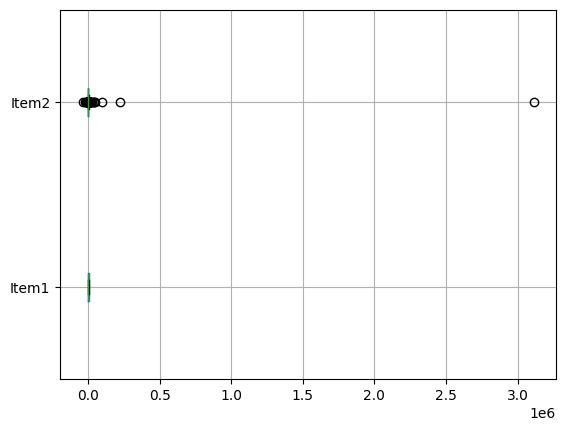

In [10]:
import matplotlib.pyplot as plt

df[['Item1', 'Item2']].boxplot(vert=False)
plt.show()


### We are already given in the problem statement that Items are non-perishable and non-seasonal in nature.
### Hence the outliers can't be due to any promotional or seasonal spikes 


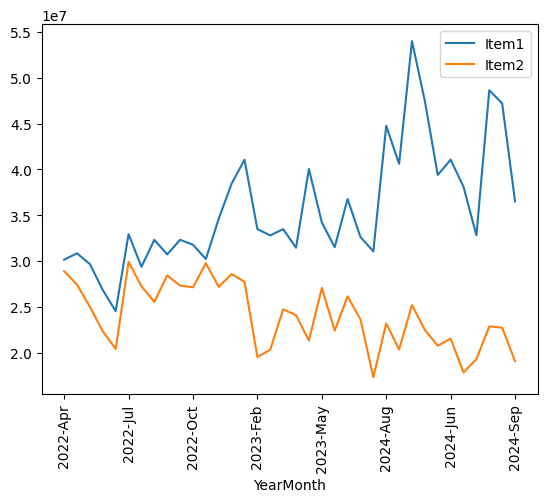

In [11]:

df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)  
df.groupby('YearMonth')[['Item1', 'Item2']].sum().plot(kind='line')  
plt.xticks(rotation=90)
plt.show()

### There are visible spikes around April to June 2024 for Item1
### Item2 exhibits a more gradual, consistent trend with some variation but fewer pronounced peaks compared to Item1.

In [12]:
df.groupby('YearMonth')[['Item1']].describe()

Item1                                                        \
             count         mean         std     min        25%       50%   
YearMonth                                                                  
2022-Apr   19565.0  1541.005914  454.195981  265.44  1140.5000  1576.520   
2022-Aug   18061.0  1707.568181  478.129529  206.82  1269.9000  1803.820   
2022-Dec   16622.0  1784.360428  518.702381  378.89  1319.4300  1838.230   
2022-Feb   14767.0  1817.119432  542.709182  371.50  1339.3000  1829.670   
2022-Jan   13611.0  1802.033786  526.923139  330.12  1330.3500  1837.370   
2022-Jul   19943.0  1651.540127  479.039117  289.40  1225.7650  1720.800   
2022-Jun   17971.0  1634.353010  468.394198  243.47  1215.8050  1717.210   
2022-Mar   17333.0  1863.995052  536.844770   94.72  1380.4800  1895.750   
2022-May   19122.0  1606.705076  455.354711  112.96  1198.2150  1679.480   
2022-Nov   18554.0  1741.834547  507.770739  340.61  1286.1425  1773.305   
2022-Oct   18147.0  1751.170149  496.735925  223.04  1300.0350  1830.950   
2022-Sep   17801.0  1697.457507  491.914761  298.96  1254.2900  1748.640   
2023-Apr   17847.0  1939.884333  552.318612  367.36  1432.7300  2038.890   
2023-Aug   18350.0  2095.572063  582.167078  415.73  1550.7575  2228.640   
2023-Dec   18903.0  2172.239882  608.063254  477.76  1599.8800  2255.200   
2023-Feb   15215.0  2200.835733  638.748113  684.89  1613.5000  2257.590   
2023-Jan   14802.0  2215.791890  627.803763  580.56  1631.9325  2323.005   
2023-Jul   17033.0  1965.811734  569.722685  516.89  1459.3500  1945.280   
2023-Jun   16164.0  1945.892731  569.262007  389.03  1433.5125  1968.385   
2023-Mar   17348.0  2308.727629  635.522102  565.59  1702.9125  2441.120   
2023-May   17599.0  1944.361068  563.107174  437.50  1429.7700  2018.570   
2023-Nov   14605.0  2157.451419  611.848324  455.10  1580.5300  2266.350   
2023-Oct   17215.0  2135.853020  598.316447  547.02  1573.3900  2238.740   
2023-Sep   16432.0  1985.411823  591.083208  384.30  1479.4125  1878.870   
2024-Apr   13876.0  2238.261832  650.592013  675.12  1651.1400  2225.010   
2024-Aug   18824.0  2377.567099  677.042402  631.65  1758.3000  2391.905   
2024-Dec   16150.0  2515.023974  714.473359  793.50  1856.1025  2566.975   
2024-Feb   20614.0  2620.035753  722.231915  756.26  1927.7950  2725.905   
2024-Jan   18614.0  2550.215652  719.916404  823.33  1880.0725  2598.705   
2024-Jul   16836.0  2340.303304  669.851812  512.27  1732.0150  2330.840   
2024-Jun   17547.0  2340.294477  666.851111  533.58  1726.5200  2397.400   
2024-Mar   14452.0  2636.573105  740.175969  797.87  1935.9850  2721.110   
2024-May   14619.0  2244.207140  662.799911  604.80  1660.5300  2208.300   
2024-Nov   19159.0  2539.445080  696.475050  643.25  1874.1400  2639.760   
2024-Oct   18560.0  2543.764794  686.763451  647.88  1870.0250  2697.195   
2024-Sep   15444.0  2364.001179  684.454435  591.79  1760.6025  2287.435   

                               
                 75%      max  
YearMonth                      
2022-Apr   1921.1700  2515.09  
2022-Aug   2091.5800  2734.99  
2022-Dec   2223.8975  2860.80  
2022-Feb   2282.1000  2943.31  
2022-Jan   2247.6000  3004.52  
2022-Jul   2046.5550  2650.55  
2022-Jun   2018.2200  2685.99  
2022-Mar   2321.1500  3052.11  
2022-May   1976.7500  2542.52  
2022-Nov   2172.0175  2864.04  
2022-Oct   2158.6800  2903.63  
2022-Sep   2107.4600  2704.01  
2023-Apr   2393.2900  3033.50  
2023-Aug   2557.3900  3230.17  
2023-Dec   2680.8700  3437.22  
2023-Feb   2740.6950  3502.27  
2023-Jan   2726.6100  3461.13  
2023-Jul   2463.1700  3319.74  
2023-Jun   2431.9075  3124.74  
2023-Mar   2816.0500  3580.57  
2023-May   2413.9650  3093.49  
2023-Nov   2656.3700  3436.17  
2023-Oct   2623.6950  3377.13  
2023-Sep   2517.2500  3269.96  
2024-Apr   2806.5450  3639.88  
2024-Aug   2961.4750  3724.39  
2024-Dec   3118.6700  3897.42  
2024-Feb   3211.3325  4103.70  
2024-Jan   3161.9900  3965.86  
2024-Jul   2923.5725  36

 ## Item1 has larger peaks in mid-2023 and early 2024 
 ## The result of the above summary:-
 ### (i) February to March 2024: The period from early 2024 (February and March) stands out as having the highest              values for both the mean and max.
 ### (ii) Mid-2023: Months like March 2023 and August 2023 show higher peaks.
 ### (iii) Late 2024: The months from July to October 2024 also have elevated values compared to the average of                    other months.

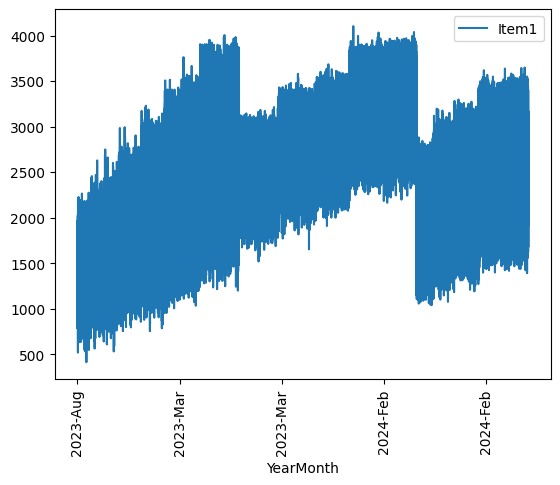

In [13]:

df['YearMonth'] = df['YearMonth'].astype(str)

high_value_months = df[df['YearMonth'].isin(['2024-Feb', '2024-Mar', '2024-Jun', '2023-Mar', '2023-Aug'])]

high_value_months.set_index('YearMonth', inplace=True)

high_value_months[['Item1']].plot(kind='line')
plt.xticks(rotation=90) 
plt.show()


In [14]:
# Check for duplicates in the 'YearMonth' column
duplicate_months = df[df.duplicated('YearMonth', keep=False)]
print(duplicate_months)


        Transaction ID   Zone  Year Month    Item1    Item2     Date YearMonth
0                    1   East  2022   Apr  1430.43  1240.36  2022-04  2022-Apr
1                    2   East  2022   Apr  1064.40  1118.87  2022-04  2022-Apr
2                    3   East  2022   Apr   619.70  1140.53  2022-04  2022-Apr
3                    4   East  2022   Apr  1063.83  1282.08  2022-04  2022-Apr
4                    5   East  2022   Apr  1472.68  1242.02  2022-04  2022-Apr
...                ...    ...   ...   ...      ...      ...      ...       ...
617700          617701  North  2024   Mar  2182.36   502.80  2024-03  2024-Mar
617701          617702  North  2024   Mar  1892.50   902.30  2024-03  2024-Mar
617702          617703  North  2024   Mar  1852.18   587.77  2024-03  2024-Mar
617703          617704  North  2024   Mar  2227.11  1338.30  2024-03  2024-Mar
617704          617705  North  2024   Mar  1914.32   606.07  2024-03  2024-Mar

[617705 rows x 8 columns]


## Grouping the data by zone and finding if there are outliers 

In [15]:
import pandas as pd

zone_group = df.groupby('Zone').agg({
    'Item1': ['mean', 'median', 'std', 'min', 'max'],
    'Item2': ['mean', 'median', 'std', 'min', 'max']
})


print(zone_group)


             Item1                                               Item2  \
              mean    median         std     min      max         mean   
Zone                                                                     
East   1403.740712  1376.845  388.901653   94.72  2994.02  1693.826316   
North  1782.809025  1686.935  528.795592  555.13  3649.64   980.367874   
South  2380.673480  2388.310  619.578620  429.63  4103.70  1524.236537   

                                                   
        median          std       min         max  
Zone                                               
East   1248.92  1005.375970  -5675.96   224099.33  
North   900.01   368.473919  -8668.68     6015.46  
South  1242.71  5215.760822 -38774.70  3111889.72  


In [16]:

from scipy import stats

# Apply Z-score to each zone for both items
df['Item1_zscore'] = df.groupby('Zone')['Item1'].transform(lambda x: stats.zscore(x, nan_policy='omit'))
df['Item2_zscore'] = df.groupby('Zone')['Item2'].transform(lambda x: stats.zscore(x, nan_policy='omit'))

# Identify rows where Z-score is greater than a threshold (e.g., 3 standard deviations from the mean)
outliers_item1 = df[df['Item1_zscore'].abs() > 3]
outliers_item2 = df[df['Item2_zscore'].abs() > 3]

# Display outliers
print("Outliers for Item1:")
print(outliers_item1[['Zone', 'Item1', 'Item1_zscore']])

print("\nOutliers for Item2:")
print(outliers_item2[['Zone', 'Item2', 'Item2_zscore']])

Outliers for Item1:
         Zone    Item1  Item1_zscore
4259     East   112.96     -3.319060
11245    East   206.82     -3.077713
12096    East   209.95     -3.069664
16074    East   223.04     -3.036005
27321    East    94.72     -3.365962
...       ...      ...           ...
617612  North  3393.96      3.046840
617637  North  3387.28      3.034208
617649  North  3456.69      3.165469
617650  North  3411.94      3.080842
617671  North  3402.89      3.063728

[601 rows x 3 columns]

Outliers for Item2:
         Zone       Item2  Item2_zscore
28712    East    -1350.34     -3.027906
33891    East   224099.33    221.217512
40330    East    -1428.80     -3.105947
51690    East    95965.83     93.768444
69255    East    -5675.96     -7.330420
72519    East     4967.26      3.255948
75195    East    -1749.18     -3.424615
84171    East    14044.44     12.284642
103281  South    19350.57      3.417787
121722  South    24999.86      4.500907
183330  South    38842.95      7.154999
216715  Sou

# Observations:
### (i) East Zone: Outliers include extremely low sales for Item 1 as low as 94.72 and unusually high values for Item 2, especially large positive values e.g., 224099.33 and negative values e.g., -5675.96.
### (ii) North Zone: Outliers include both high sales for Item 1 up to 3456.69 and high/low sales for Item 2 ranging from -8668.68 to 6015.46.
### (iii) South Zone: For Item 2, there are extreme high values such as 3111889.72 and some large negative values, indicating significant fluctuations.

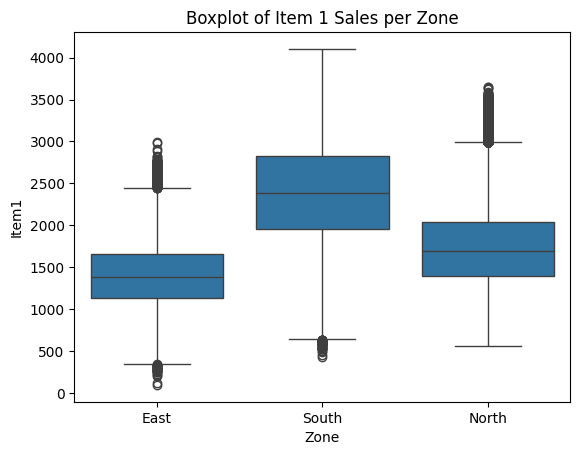

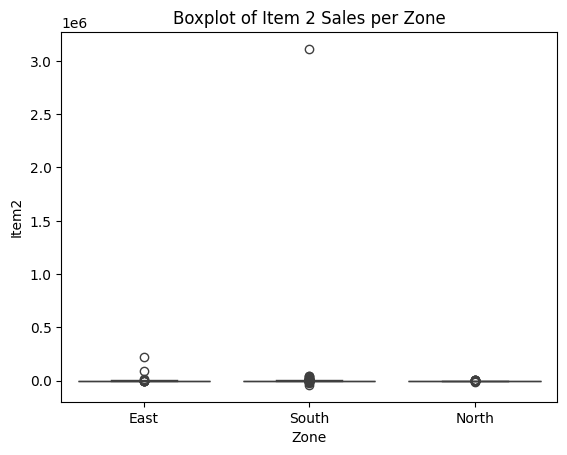

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for each item
sns.boxplot(data=df, x='Zone', y='Item1')
plt.title("Boxplot of Item 1 Sales per Zone")
plt.show()

sns.boxplot(data=df, x='Zone', y='Item2')
plt.title("Boxplot of Item 2 Sales per Zone")
plt.show()


# Observations
# Item 1
## East Zone:

### (i) Median sales appear to be the lowest among the three zones, sitting between 1,000 and 1,500. 
### (ii) There's a tight interquartile range (IQR), but with several outliers present both below and above the main distribution.
### (iii) The upper whisker extends slightly beyond 2,500.

## South Zone:

### (i) The median is much higher than East and North, close to 2,500.
### (ii) The IQR is wider than East, indicating greater variability in sales.
### (iii) There are several high-value outliers above 4,000, which could represent significant purchases or anomalies.

## North Zone:

### (i) The median sales are between 1,500 and 2,000, similar to East but higher overall.
### (ii) The IQR is wider than East, but not as wide as South, indicating moderate variability.
### (iii) Outliers are present above the whisker, though fewer than in the South.

# Item 2
## East Zone:
### (i) Median sales appear to be very low, close to 0, indicating low typical sales for Item 2 in this zone.
### (ii) There are several outliers present, with one extreme outlier significantly higher, reaching about 3 million. This suggests occasional very large sales in this zone.
### (iii) The interquartile range (IQR) is quite narrow, indicating little variability in sales for most of the data, but the outliers suggest some rare, very high sales.
## South Zone:
### (i) The median remains low, and the IQR is also narrow, similar to the East zone. 
### Most sales values are close to 0.
### (ii) There are fewer outliers compared to the East zone, but a few points still fall outside the whiskers, indicating some anomalies in sales but not as extreme.
## North Zone:
### (i) Like the East and South zones, the median is very close to 0, and the IQR is narrow.
### (ii) There is a single visible outlier, but its value is far lower compared to the outliers in the East zone.

## Hence, capping the legitimate but extreme outliers at the 95th and 5th percentiles of the data for both Item1 and Item2. This way, extreme outliers are reduced while keeping the overall trend intact.

In [18]:
lower_bound_item1 = df['Item1'].quantile(0.05)
upper_bound_item1 = df['Item1'].quantile(0.95)

lower_bound_item2 = df['Item2'].quantile(0.05)
upper_bound_item2 = df['Item2'].quantile(0.95)

In [19]:
df['Item1'] = df['Item1'].clip(lower_bound_item1, upper_bound_item1)
df['Item2'] = df['Item2'].clip(lower_bound_item2, upper_bound_item2)

In [20]:
# Recalculate Z-scores after capping
df['Item1_zscore_after'] = stats.zscore(df['Item1'])
df['Item2_zscore_after'] = stats.zscore(df['Item2'])

# Check the new Z-scores for any remaining extreme outliers
outliers_item1_after = df[df['Item1_zscore_after'].abs() > 3]
outliers_item2_after = df[df['Item2_zscore_after'].abs() > 3]

# Display outliers after capping
print(outliers_item1_after)
print(outliers_item2_after)

Empty DataFrame
Columns: [Transaction ID, Zone, Year, Month, Item1, Item2, Date, YearMonth, Item1_zscore, Item2_zscore, Item1_zscore_after, Item2_zscore_after]
Index: []
Empty DataFrame
Columns: [Transaction ID, Zone, Year, Month, Item1, Item2, Date, YearMonth, Item1_zscore, Item2_zscore, Item1_zscore_after, Item2_zscore_after]
Index: []


### After capping, there are no remaining extreme outliers for Item 1 or Item 2 
### capping effectively handled the extreme values, bringing all data points within a reasonable range based on Z-scores.

In [21]:
summary_stats = df.groupby('Zone').agg({
    'Item1': ['mean', 'median', 'std', 'min', 'max'],
    'Item2': ['mean', 'median', 'std', 'min', 'max']
})

print(summary_stats)

             Item1                                                Item2  \
              mean    median         std      min      max         mean   
Zone                                                                      
East   1442.408627  1376.845  336.286955  1079.97  2994.02  1686.356187   
North  1785.866099  1686.935  520.898586  1079.97  3249.36   985.172844   
South  2363.888804  2388.310  582.806036  1079.97  3249.36  1513.570319   

                                              
        median         std     min       max  
Zone                                          
East   1248.92  580.091860  568.02  2463.478  
North   900.01  360.576083  568.02  2463.478  
South  1242.71  613.391246  568.02  2463.478  


## Before Treatment:

### The extreme outliers in both Item 1 and Item 2 created large variances, especially in South and East zones, which could have skewed any downstream analyses.
### These extreme values were likely errors or very rare purchases, and their presence made the standard deviation (std) and range very large.
## After Treatment:

### By capping the outliers (likely at the 95th percentile or similar), the spread of the data is more controlled, and the extreme variability has been removed, making the data more suitable for further analysis.
### The median values stayed the same across zones, which indicates that the central tendency of the data was not impacted by the outlier treatment.

# Trend Analysis Over Time (by Year/Month):



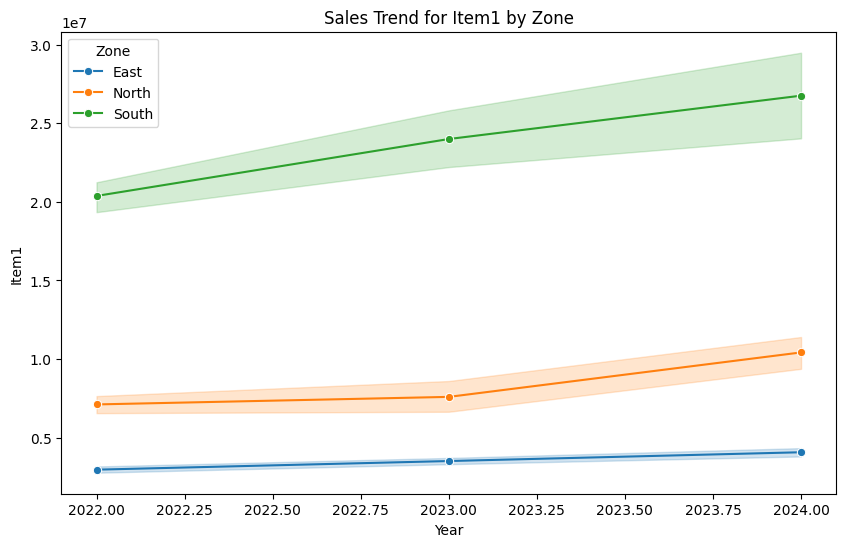

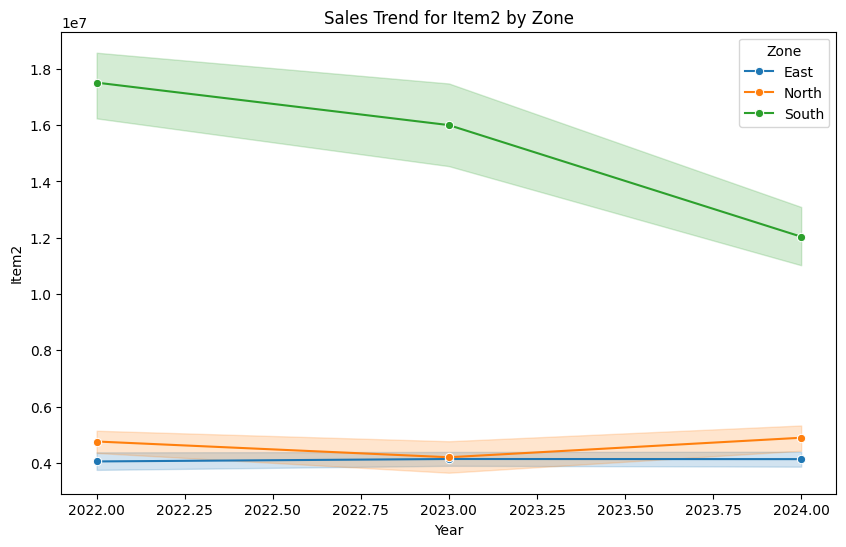

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df_grouped = df.groupby(['Year', 'Month', 'Zone'])[['Item1', 'Item2']].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(data=df_grouped, x='Year', y='Item1', hue='Zone', marker='o')
plt.title('Sales Trend for Item1 by Zone')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='Year', y='Item2', hue='Zone', marker='o')
plt.title('Sales Trend for Item2 by Zone')
plt.show()


# Observations
## Item 1
### South Zone (green line): This zone has the highest sales for Item1, with a consistent upward trend from 2022 to 2024.
### North Zone (orange line): The North Zone shows moderate sales, with a slight increase over time.
### East Zone (blue line): Sales are the lowest in the East Zone, with almost no significant change over the years.

## Items 2
### South Zone: Item2 sales in the South Zone show a declining trend over the years, starting from around 18 unit in 2022 to around 14 unit by 2024. This is contrary to the steady growth observed for Item1 in this zone.
### North Zone: In the North Zone, the sales of Item2 show a slight dip around 2023, but overall remain fairly stable with a small increase in 2024. The change over time is minor compared to the South Zone.
### East Zone: The East Zone shows very little variation in sales of Item2, maintaining consistently low sales throughout the years.

## Inferences:
### Sales Dynamics in the South Zone:

#### The South Zone exhibits significantly higher sales for both items. However, while Item 1 shows strong growth, Item 2 is experiencing a decline.
#### This disparity indicates potential customer satisfaction or loyalty issues with Item 2, suggesting a need for reevaluation of marketing strategies or product offerings.
### North Zone Stability:

#### The North Zone shows moderate and relatively stable sales for both items. Despite this, Item 1 demonstrates a slightly better upward trend.
#### There may be opportunities to boost sales for Item 2 through targeted promotions or adjustments based on customer feedback.
### Challenges in the East Zone:

#### Both items in the East Zone exhibit low sales performance and minimal changes over time.
#### This stagnation may require significant strategic initiatives to increase market penetration, such as localized marketing campaigns or exploring different distribution channels.

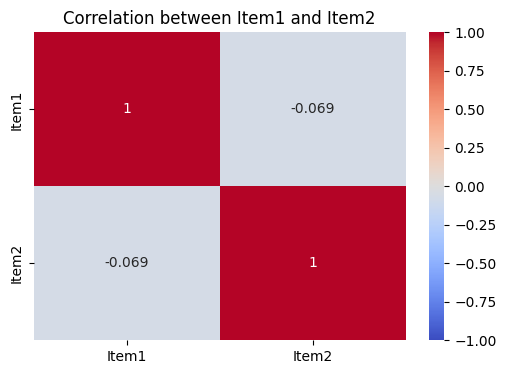

In [23]:
# Correlation matrix
correlation_matrix = df[['Item1', 'Item2']].corr()

# Plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Item1 and Item2')
plt.show()

### The correlation heatmap between Item1 and Item2 shows a very weak negative correlation of -0.069.

### -0.069 suggests that the relationship between Item1 and Item2 is almost negligible, but slightly negative. This means that as sales of one item increase, the sales of the other decrease very slightly

## 

C:\Users\sdswa\AppData\Local\Temp\ipykernel_18208\1618176695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Date'] = zone_data['Date'].dt.to_timestamp()


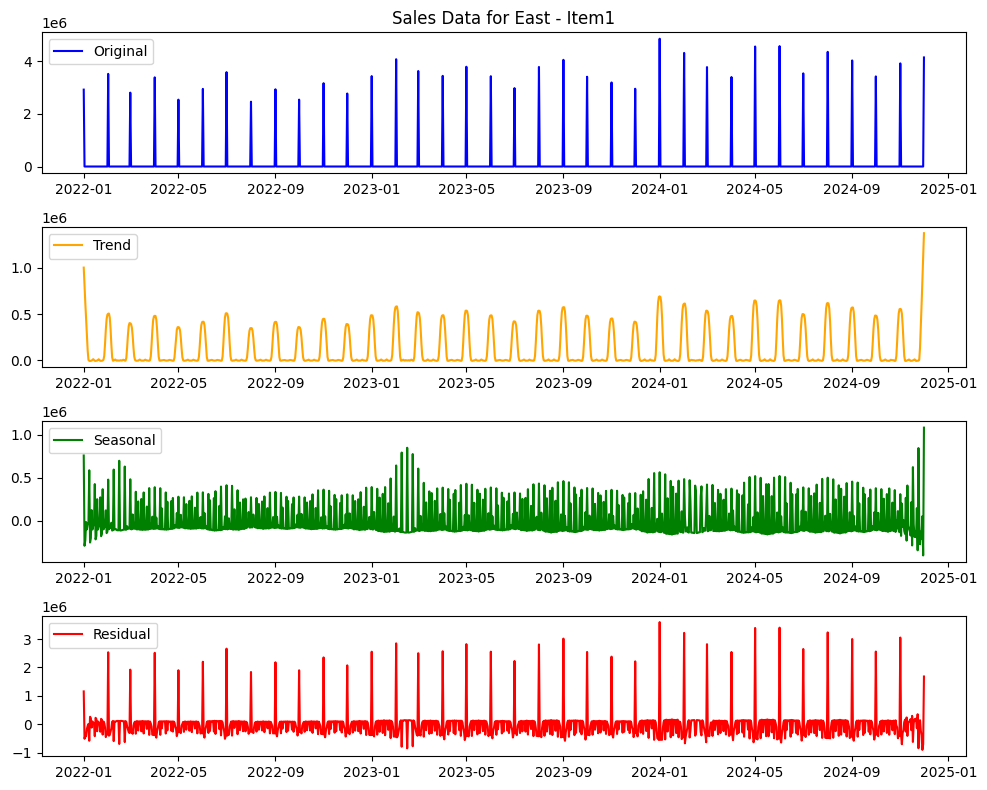

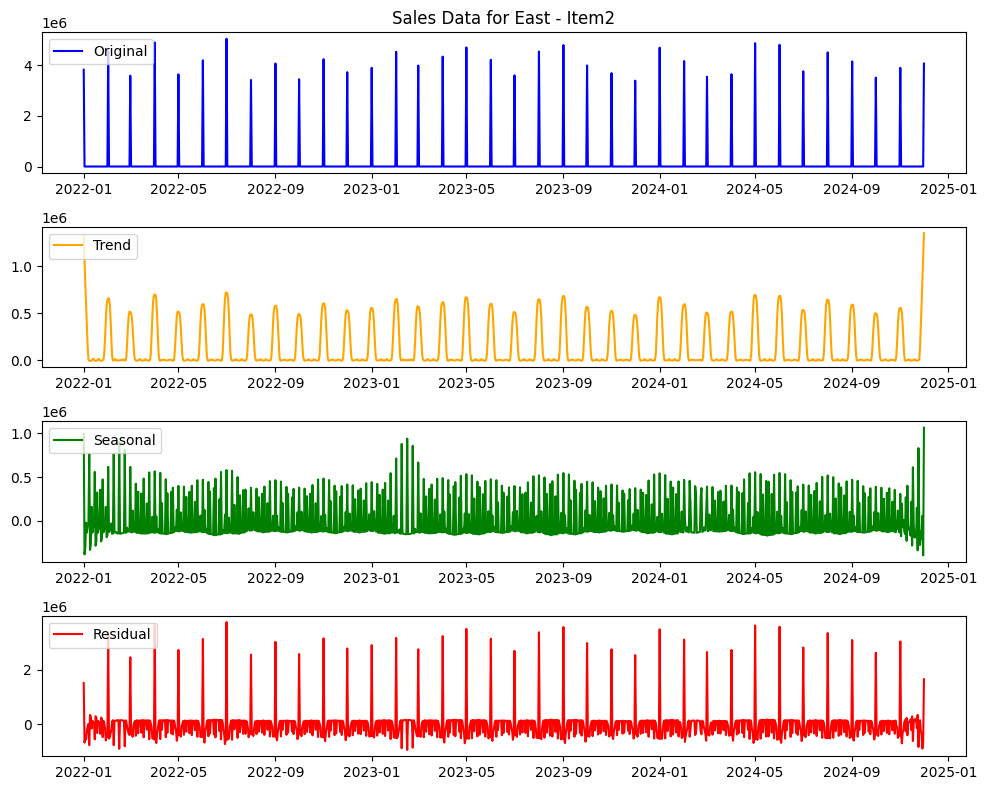

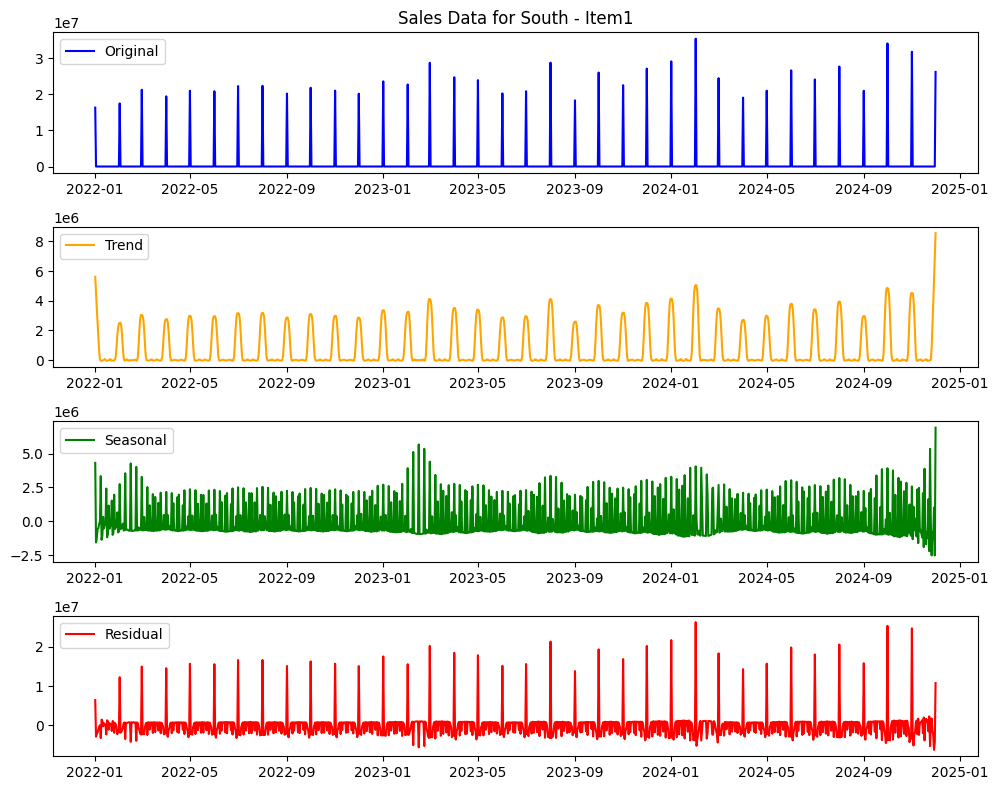

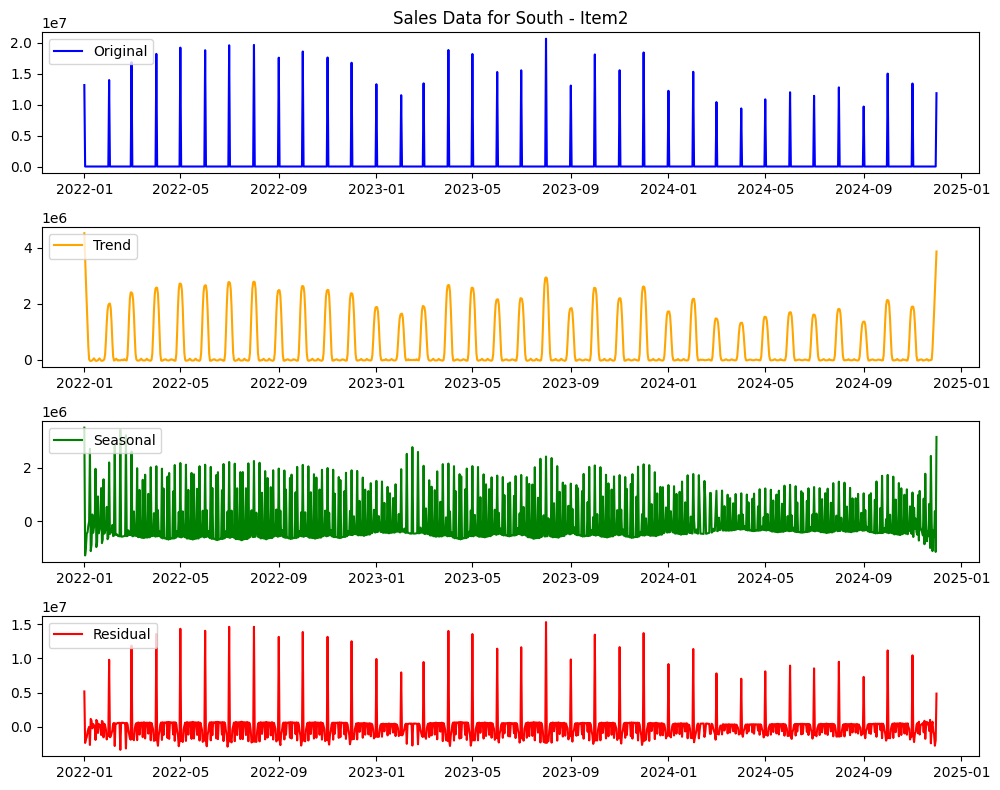

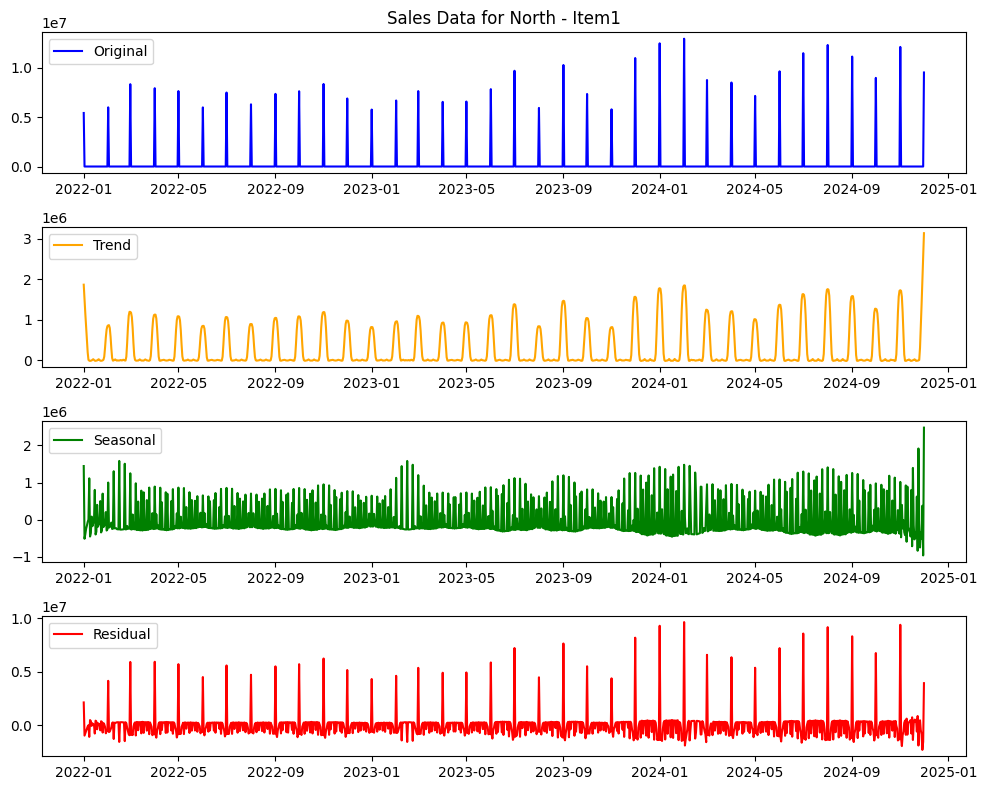

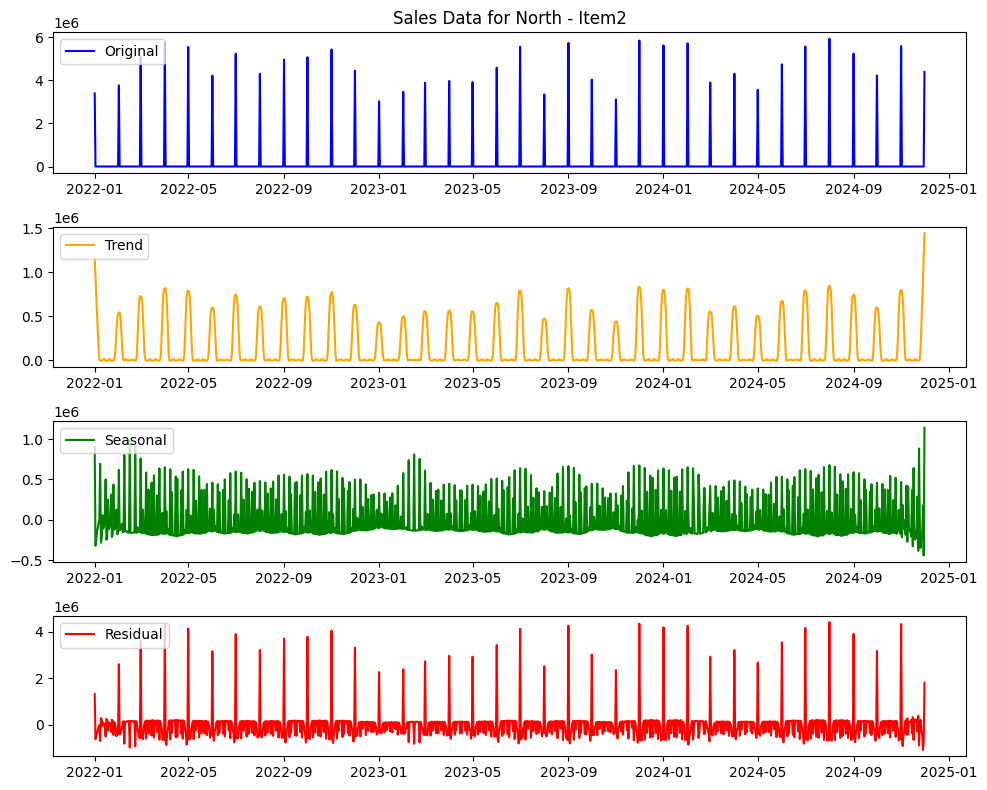

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Assuming 'df' is your DataFrame containing the sales data
def perform_stl_decomposition(df):
    # Get unique zones
    zones = df['Zone'].unique()

    for zone in zones:
        # Filter data for the specific zone
        zone_data = df[df['Zone'] == zone]
        
        # Convert 'Date' to timestamp if it's of PeriodDtype
        if pd.api.types.is_period_dtype(zone_data['Date']):
            zone_data['Date'] = zone_data['Date'].dt.to_timestamp()

        # Set 'Date' as the index
        zone_data.set_index('Date', inplace=True)

        # Aggregate data to ensure unique dates, summing up sales for duplicate dates
        zone_data = zone_data.resample('D').sum()

        # Check if the DataFrame is empty after resampling
        if zone_data.empty:
            print(f"No data available for zone: {zone}")
            continue

        # Perform STL decomposition on Item1 and Item2
        for item in ['Item1', 'Item2']:
            # Check if the item exists in the zone data
            if item not in zone_data.columns:
                print(f"{item} not found in zone data for {zone}.")
                continue

            stl = STL(zone_data[item], seasonal=13)  # Adjust seasonal parameter as needed
            result = stl.fit()

            # Plot the decomposition
            plt.figure(figsize=(10, 8))
            plt.subplot(4, 1, 1)
            plt.plot(zone_data[item], label='Original', color='blue')
            plt.title(f'Sales Data for {zone} - {item}')
            plt.legend(loc='upper left')

            plt.subplot(4, 1, 2)
            plt.plot(result.trend, label='Trend', color='orange')
            plt.legend(loc='upper left')

            plt.subplot(4, 1, 3)
            plt.plot(result.seasonal, label='Seasonal', color='green')
            plt.legend(loc='upper left')

            plt.subplot(4, 1, 4)
            plt.plot(result.resid, label='Residual', color='red')
            plt.legend(loc='upper left')

            plt.tight_layout()
            plt.show()

# Perform STL decomposition
perform_stl_decomposition(df)



## Sales Data for East
### The analysis of Item 1 and Item 2 in the East Zone highlights positive sales trends, significant seasonal influences, and the need for strategic adjustments in marketing and inventory management. By focusing on tailored strategies based on detailed sales patterns and ongoing data analysis, the business can enhance sales performance and improve overall outcomes. Future studies should aim to explore external factors that may impact sales trends and seasonality further, providing deeper insights for strategic planning.

## Sales Data for South
### The STL decomposition analysis of Item 1 and Item 2 sales in the South Zone reveals positive growth trends and significant seasonal influences. Item 2 shows a stronger response to seasonal factors, with sharp fluctuations, while Item 1's growth is steadier with less seasonal variability. To optimize performance, businesses should focus on tailored marketing and inventory strategies for each item. Item 2 may benefit from more dynamic and seasonal marketing efforts, while Item 1 requires a consistent approach with occasional boosts during peak periods. Monitoring sales patterns regularly will allow for timely adjustments and ensure that strategies remain aligned with evolving market conditions.



## Sales Data for North
### The STL decomposition analysis for Item 1 and Item 2 in the North Zone indicates that both items are experiencing positive growth trends, though Item 1 is growing more rapidly and is more sensitive to seasonal factors. Item 2 shows steady, year-round demand with moderate seasonal influence. By aligning marketing and inventory strategies with these sales dynamics, businesses can optimize performance. A focus on flexible, dynamic strategies for Item 1 and a steady, consistent approach for Item 2 will help ensure continued success in the North Zone. Additionally, regular monitoring and analysis will allow for timely adjustments as market conditions evolve.

## Price Elasticity Analysis


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from statsmodels.tsa.arima.model import ARIMA



np.random.seed(42)
df['Price_Item1'] = np.random.uniform(100, 150, len(df))
df['Price_Item2'] = np.random.uniform(80, 130, len(df))

# Price Elasticity for Item1
X_item1 = df[['Price_Item1', 'Zone']]
X_item1 = pd.get_dummies(X_item1, drop_first=True)  # Convert categorical 'Zone' to numerical
y_item1 = df['Item1']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_item1, y_item1, test_size=0.3, random_state=42)

# Linear regression model
lr_model_item1 = LinearRegression()
lr_model_item1.fit(X_train, y_train)

# Predictions and evaluation
y_pred_item1 = lr_model_item1.predict(X_test)
print("R-squared for Item1:", r2_score(y_test, y_pred_item1))
print("RMSE for Item1:", np.sqrt(mean_squared_error(y_test, y_pred_item1)))

# Price Elasticity for Item2
X_item2 = df[['Price_Item2', 'Zone']]
X_item2 = pd.get_dummies(X_item2, drop_first=True)  # Convert categorical 'Zone' to numerical
y_item2 = df['Item2']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_item2, y_item2, test_size=0.3, random_state=42)

# Linear regression model
lr_model_item2 = LinearRegression()
lr_model_item2.fit(X_train, y_train)

# Predictions and evaluation
y_pred_item2 = lr_model_item2.predict(X_test)
print("R-squared for Item2:", r2_score(y_test, y_pred_item2))
print("RMSE for Item2:", np.sqrt(mean_squared_error(y_test, y_pred_item2)))



R-squared for Item1: 0.3090887253488759
RMSE for Item1: 537.1896425016698
R-squared for Item2: 0.17868181797888882
RMSE for Item2: 550.6730423603689


## Demand Forecasting:

In [26]:
df['Total_Sales'] = df['Item1'] + df['Item2']
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have your DataFrame ready as df_grouped with Total_Sales

# If your index is in Period format, convert it to datetime
if isinstance(df_grouped.index, pd.PeriodIndex):
    df_grouped.index = df_grouped.index.to_timestamp()

# Fit the ARIMA model (assuming df_grouped['Total_Sales'] is correctly set up)
model = ARIMA(df_grouped['Total_Sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecasting
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Create a new index for the forecast
forecast_index = pd.date_range(start=df_grouped.index[-1] + pd.Timedelta(days=1), 
                                 periods=forecast_steps, freq='D')

# Convert forecast to a DataFrame
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Total_Sales'], label='Historical Sales')
plt.plot(forecast_df, label='Forecast Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()



KeyError: 'Total_Sales'

In [ ]:
print(df.columns)


In [27]:
pip install --upgrade scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.


## Clustering Analysis

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering (grouping by zone and aggregating sales)
df_grouped = df.groupby('Zone').agg({'Item1': 'sum', 'Item2': 'sum'}).reset_index()

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_grouped[['Item1', 'Item2']])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_grouped['Cluster'] = kmeans.fit_predict(df_scaled)

# View the results
print(df_grouped)


    Zone         Item1         Item2  Cluster
0   East  1.265916e+08  1.480014e+08        2
1  North  3.015649e+08  1.663583e+08        0
2  South  8.535506e+08  5.465185e+08        1


N:\vs code\acaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Observation
## (1) Cluster 0 (North Zone)
Item 1 Sales: 301,564,900
Item 2 Sales: 166,358,300
Analysis: The North Zone is part of Cluster 0, indicating that its sales pattern is distinct from the other zones. It exhibits relatively high sales of Item 1 but comparatively moderate sales of Item 2.
Strategic Insight:
Focus on Item 1: Since sales of Item 1 are strong, the North Zone may have a stable and growing demand for this product. Further strengthening the supply chain and maintaining stock availability for Item 1 will be essential.
Growth Potential for Item 2: Sales of Item 2, while solid, are lower than expected. This presents an opportunity to focus on boosting Item 2 sales through targeted promotions or bundling with Item 1.
## (2) Cluster 1 (South Zone)
Item 1 Sales: 853,550,600
Item 2 Sales: 546,518,500
Analysis: The South Zone is in Cluster 1 and stands out with significantly higher sales of both Item 1 and Item 2. This zone is a high-revenue generator for both products.
Strategic Insight:
Sustain Growth: The South Zone is a top performer. It is crucial to continue building on this success. Consider enhancing customer loyalty programs or expanding market presence to sustain growth.
Targeted Marketing: Since both items are performing well, cross-selling or upselling initiatives can be more effective in this zone. Marketing campaigns should emphasize the quality and complementary nature of Item 1 and Item 2.
## (3) Cluster 2 (East Zone)
Item 1 Sales: 126,591,600
Item 2 Sales: 148,001,400
Analysis: The East Zone belongs to Cluster 2, characterized by lower sales for both Item 1 and Item 2 compared to the North and South zones. It shows stronger performance in Item 2 than in Item 1.
Strategic Insight:
Focus on Item 2: Since Item 2 performs better in the East Zone, prioritize efforts to continue its upward trend. Promotions, incentives, or discounts targeted towards Item 2 customers can further boost sales.
Increase Item 1 Sales: Item 1 sales are notably lower in this zone, so tailored strategies such as region-specific campaigns, product awareness initiatives, or price adjustments may be needed to stimulate demand.


## Recommdations
### Cluster-Based Marketing: Develop distinct marketing strategies based on the cluster each zone falls into. For instance:

#### Cluster 1 (South): Focus on loyalty programs and retention strategies since both products are in high demand.
#### Cluster 2 (East): Use targeted campaigns to boost Item 1 sales while continuing to support Item 2.
#### Cluster 0 (North): Consider growth initiatives for Item 2 while maintaining strong sales for Item 1.

### Inventory Optimization: Allocate inventory based on cluster insights:

### South Zone (Cluster 1): Maintain high stock levels for both Item 1 and Item 2.
#### North Zone (Cluster 0): Ensure steady availability of Item 1, but focus on increasing stock during promotional periods for Item 2.
#### East Zone (Cluster 2): Focus on balanced stock levels but prioritize inventory for Item 2.

### Cross-Selling Opportunities:
#### For the South and North Zones, where Item 1 and Item 2 show strong performance, encourage cross-selling by bundling products or offering discounts for purchasing both.

In [31]:
pip install dtaidistance

     ---------------------------------------- 1.1/1.1 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Segment-Specific Demand Forecasting

In [33]:

for zone in df['Zone'].unique():
    df_zone = df[df['Zone'] == zone].groupby('Date').agg({'Item1': 'sum'}).reset_index()
    model_arima = ARIMA(df_zone['Item1'], order=(5, 1, 0))  
    model_arima_fit = model_arima.fit()
    
    forecast = model_arima_fit.forecast(steps=12)
    print(f"Forecast for {zone}: {forecast}")



Forecast for East: 36    4.013685e+06
37    3.915910e+06
38    3.864555e+06
39    3.973456e+06
40    4.005236e+06
41    3.947566e+06
42    3.935339e+06
43    3.945187e+06
44    3.962859e+06
45    3.962628e+06
46    3.948645e+06
47    3.949354e+06
Name: predicted_mean, dtype: float64
Forecast for South: 36    2.548008e+07
37    2.643269e+07
38    2.850214e+07
39    2.793892e+07
40    2.733069e+07
41    2.697874e+07
42    2.731884e+07
43    2.754026e+07
44    2.750566e+07
45    2.737444e+07
46    2.733456e+07
47    2.738574e+07
Name: predicted_mean, dtype: float64
Forecast for North: 36    1.087481e+07
37    1.089656e+07
38    1.086511e+07
39    1.049645e+07
40    1.081627e+07
41    1.045311e+07
42    1.068531e+07
43    1.071029e+07
44    1.074258e+07
45    1.067678e+07
46    1.068963e+07
47    1.062436e+07
Name: predicted_mean, dtype: float64


## East Zone Forecast:
The sales are relatively stable, fluctuating slightly between 3.86 million and 4.01 million.
This indicates steady demand, with no major upward or downward trends observed in the short-term forecast.
## South Zone Forecast:
The sales figures are much higher in the South zone, with values fluctuating between 25.48 million and 28.50 million.
The forecast shows a slight decline after a peak in period 38 (28.50 million) but remains around 27 million afterward. This could suggest seasonal or demand cycles that peak and then stabilize.
## North Zone Forecast:
The sales in the North zone are in the range of 10.49 million to 10.89 million, showing more stability and less variation compared to the South.
Like the East, the North zone sales are stable with small fluctuations, suggesting a consistent demand pattern in this region.

In [35]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
from mlxtend.frequent_patterns import apriori, association_rules

df_basket = df.pivot_table(index='Transaction ID', columns='Zone', values=['Item1', 'Item2'], aggfunc='sum').fillna(0)

# Convert sales data into binary (1 for non-zero values, 0 for zero values)
df_basket = df_basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply apriori to find frequent itemsets
frequent_itemsets = apriori(df_basket, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# View the rules
print(rules)


N:\vs code\acaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


        antecedents       consequents  antecedent support  consequent support  \
0   ((Item1, East))   ((Item2, East))            0.142081            0.142081   
1   ((Item2, East))   ((Item1, East))            0.142081            0.142081   
2  ((Item1, North))  ((Item2, North))            0.273370            0.273370   
3  ((Item2, North))  ((Item1, North))            0.273370            0.273370   
4  ((Item2, South))  ((Item1, South))            0.584549            0.584549   
5  ((Item1, South))  ((Item2, South))            0.584549            0.584549   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.142081         1.0  7.038250  0.121894         inf            1.0  
1  0.142081         1.0  7.038250  0.121894         inf            1.0  
2  0.273370         1.0  3.658046  0.198639         inf            1.0  
3  0.273370         1.0  3.658046  0.198639         inf            1.0  
4  0.584549         1.0  1.710720  0.242851         inf            

#### In our analysis, we employed association rule mining to identify patterns in customer purchasing behavior across different zones. The antecedents and consequents reveal itemsets involved in the rules; for instance, the rule ((Item1,East))→((Item2,East)) suggests that purchasing Item1 in the East zone may lead to buying Item2 in the same region. Support indicates the proportion of transactions containing both items, with a value of 0.142081 signifying that approximately 14.2% of transactions include both items. Confidence measures the likelihood of the consequent being purchased given the antecedent, with a score of 1.0 indicating that whenever Item1 is purchased, Item2 is also bought. 

#### The lift metric further assesses the strength of the association, revealing how much more likely the consequent is purchased when the antecedent is present compared to the average purchase rate; a lift greater than 1 denotes a positive association. Lastly, leverage and conviction provide additional insights into the reliability of these rules, supporting data-driven strategies to enhance marketing efforts and optimize inventory management.

